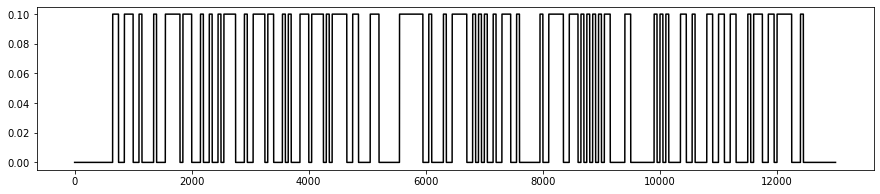

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#Inputs to generate plume
argv=['9','598','22','2']
 
#parameters for resolution and block size
blocktime = 12000 # in ms
sim_res = 1 # in ms
min_block = 50 # in ms

#Control over the fine-ness of plume layers
def intermittent(argv): 
  np.random.seed(int(argv[1])+int(argv[2])+int(argv[3]))
  switch_prob = 0.4
  if switch_prob == 0.0:
    sw_state = [1]
  else:
    sw_state = [0]

#Generating the intitial string
  flag_print=1
  rand_string=np.random.choice([0,1],p=[1-switch_prob,switch_prob],size=int(blocktime/min_block)-1)

#makes a random sequence of ones and zeros the shape of blocktime/min blocktime
  for i in rand_string: 
    if flag_print==1:
        flag_print=0
    if i==1:
        sw_state.append(1-sw_state[-1])
    else:
        sw_state.append(sw_state[-1])
        
  sw_state=np.pad(sw_state, (10, 10), 'constant', constant_values=(0, 0)) #add buffer of zeros to both ends of the string
  ts = np.repeat(sw_state,int(min_block/sim_res)) #Expands the sequenc to get the turbulant fluid stream
  ts= np.array(ts/10)
  return ts

argv=['98','5908798','2222222','2']
ts = intermittent(argv)
xAxis=np.arange(len(ts))
plt.figure(figsize=(15,3))
plt.plot(xAxis,ts, color='black')
plt.show()

In [15]:
from brian2 import *
%matplotlib inline
import numpy as np
from numpy import heaviside
from math import *
import pandas as pd
from numba import jit

@jit
# Potential function
def U(phi,I=1.01,gamma=1,T=4.615120516841259, tau=1):
    value = (I/gamma)*(1-np.exp(-gamma*T*phi/tau))
    return value
@jit
# Function to convert potential to 'phase' corresponding to Mirollo-Strogatz model
def U_inv(y,I=1.01,gamma=1,T=4.615120516841259,tau=1):
    value = (tau/(gamma*T))*np.log((1-(gamma*y/I))**(-1))
    return value
## Loading Inhibitory and Excitatory Edge topology from a 81 × 81 Matrix specifying 20 connections for each neuron 
# Import Sudoku matrices: (rows: pre-synaptic, columns: post-synaptic)

inhib_connect = np.loadtxt('Clueless_Sudoku_inhib.txt', dtype=int)
excit_connect = np.loadtxt('Clueless_Sudoku_excit.txt', dtype=int)

# Get tuples of corresponding connection indices for putting in Brian2's synapse connect() function
inhib_pre, inhib_post = inhib_connect.nonzero()
excit_pre, excit_post = excit_connect.nonzero()